
There are times when we all have to make an electricity source choice. Well, this is the case for Naomi. Naomi has opted for solar panels to meet any electricity usage needs in her house. Installing solar panels has saved Naomi more money as it has minimized the amount she was spending on electricity provider. However, she is not receving benefit or income generated by the solar panels. Imagine if she wants to run an incubator which needs 24hour electricity supply, she still can't benefit. So, Naomi is considering purchasing a battery to store more elctricity. 

The battery that Naomi is considering costs $7,000 and would be installed on 1 January 2022, with an expected working lifetime of 20 years. The battery can store a maximum amount of
12.5 kWh of electricity at any one time (and is subject to a minimum of 0 kWh). Any electricity generated from the solar panels when the battery is full will not be able to be stored. Electricity usage would first be met from current solar electricity generation, then from any stored battery energy and finally by paying for electricity from the electricity provider.

From 1 January 2022, Naomi will pay $0.17 for each kWh of electricity purchased from her electricity provider. The electricity price increases with annual electricity price inflation on 1 January 2023, and each 1 January thereafter. A recent government report estimated electricity price inflation over the next 20 years to be 4% p.a. Naomi thinks that the global focus on climate change will cause electricity prices to rise faster than 4% p.a. and she
estimates that electricity price inflation may increase by an additional 0.25% p.a. year on year (i.e. an increase of 4.0% p.a. at 1 January 2023, 4.25% p.a. at 1 January 2024, 4.50% at
1 January 2025, etc.).r.So, to determine whether installing the battery is cost effective, Naomi installed a measuring device that captures solar electricity generation and electricity usage data. So, we will be using Naoimi's 2020 data to help naomi analyse whether battery option is cost effective. 
From Naomi's data, we will analyse the potential savings in her electricity costs from battery purchase on an hourly basis. We will also calculate the extra amount of electricity in kwh met from solar panel and battery combination, the NVP of the battery investmenty, and the IRR. This is what the data entails:te1. d.

Electricity (including that generated by solar panels, stored in the battery and purchased from the electricity provider) is measured in kilowatt hours 
2. Hour from zero(hour from midninght to 01:00)
3. The date(includes the date, month, and year the data was captured)
4. Hour start(represents the hour start)
5. Solar electricity generation(in kWh)
6. Electricity usage(in kWh)(ki.

Additional guidance
The IRR of a project is the discount rate that results in the NPV of the expected inflows associated with the project being equal to its initial cost.
n hourly basis.


So, for analysis, we will have to import all the necessary libraries we will be using. There after we will import Naomi's downloaded data. We will use the downloaded file path location in my laptop. 

In [29]:
#data analysis and manipulation
import numpy as np
import pandas as pd

#data visualization

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


We cant analyze this data because the columns are mixed up. So, what I will do is to first organize the unnecessary columns to avoid confusion. I will do this directly in excel so that we can import  a clean data

In [59]:
#load data
data= "C:/Users/Admin/Downloads/Junior Data Analyst _ Data.xlsx"
Naomi=pd.read_excel(data)
Naomi.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000
8759,23,2020-12-31 23:00:00,0.000,0.805919


In [62]:
#the data/hour start column needs to be separated to make analysis easier and worka

In [32]:
Naomi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


Our data has a total of four columns with datatypes, int, float, and datetime

In [33]:
#descriptive statistics
Naomi.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


1. The maximum electricity generated is 13.05kWh
2. The highest electricity usage in Naomi's household is 45000kWh and the least is -12.624kWh
3. The average solar electricity generated is 1.116750 kWh

In [34]:
Naomi.shape

(8760, 4)

Naomi's data is big with 8760 rows and 4 columns

Next we check if there are any missing data

In [35]:
#use mean to check for missing values
Naomi.isnull().mean()

Hour                                  0.0
Date/hour start                       0.0
Solar electricity generation (kWh)    0.0
Electricity usage (kWh)               0.0
dtype: float64

There are no missing data

In [48]:
#(i)
#average solar electricity generation 
Average_solar_generation= Naomi["Solar electricity generation (kWh)"].mean()
print(Average_solar_generation)

1.1167496575342466


In [37]:
#average electricity usage for each hour in a day
Average_electricity_usage=Naomi["Hour"].mean()
print(Average_electricity_usage)

11.5


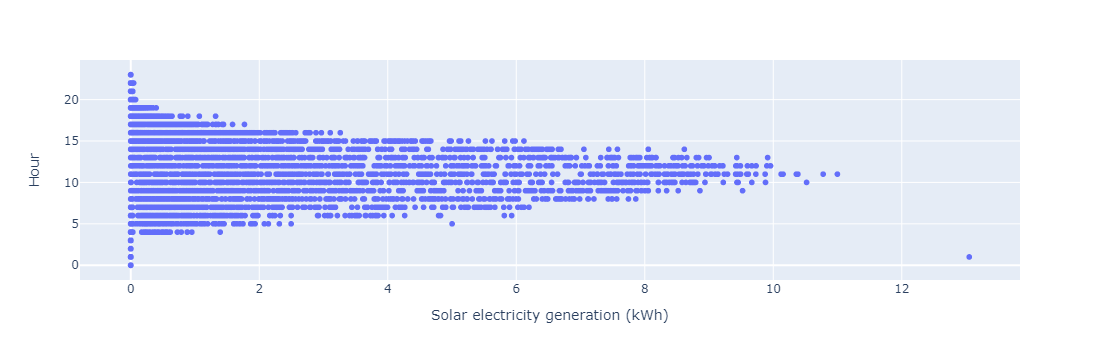

In [47]:
#create a graph showing the average solar electricity generation and average electricity usage for each hour in a day
fig=px.scatter(Naomi, x="Solar electricity generation (kWh)", y="Hour")
fig

I have choosen to use scatter plot because its easier to interpret especially when comparing data statistically.
1. The least solar electricity generation in kWh was in Hour 16 at 0.174kWh
2. The highest solar electricity generation was in Hour 1 at 13.05kWh

In [ ]:
Honestly, the rest of the questions are beyond the little knowledge I have. Thank you